In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stat
import math

In [2]:
udemy_course = pd.read_csv('udemy_courses.csv')

In [3]:
udemy_course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 12 columns):
course_id              3683 non-null int64
course_title           3683 non-null object
url                    3683 non-null object
is_paid                3683 non-null object
price                  3683 non-null object
num_subscribers        3683 non-null int64
num_reviews            3683 non-null int64
num_lectures           3683 non-null int64
level                  3683 non-null object
content_duration       3683 non-null object
published_timestamp    3683 non-null object
subject                3683 non-null object
dtypes: int64(4), object(8)
memory usage: 345.4+ KB


In [47]:
udemy_course.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [51]:
nan_df = udemy_course[udemy_course.isna().any(axis=1)]
nan_df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject


In [56]:
unique = udemy_course.price.unique()
unique

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', 'Free', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135', 'TRUE'],
      dtype=object)

In [77]:
free_courses = udemy_course[udemy_course.price == 'Free'].reset_index(drop=True)
max_subscribers = free_courses.loc[free_courses['num_subscribers'].idxmax()]
max_subscribers

course_id                                                          41295
course_title                        Learn HTML5 Programming From Scratch
url                    https://www.udemy.com/learn-html5-programming-...
is_paid                                                            False
price                                                               Free
num_subscribers                                                   268923
num_reviews                                                         8629
num_lectures                                                          45
level                                                         All Levels
content_duration                                              10.5 hours
published_timestamp                                 2013-02-14T07:03:41Z
subject                                                  Web Development
Name: 201, dtype: object

In [78]:
min_subscribers = free_courses.loc[free_courses['num_subscribers'].idxmin()]
min_subscribers

course_id                                                  968026
course_title               Learn to Play Tabla - The Indian drums
url                    https://www.udemy.com/learn-to-play-tabla/
is_paid                                                     FALSE
price                                                        Free
num_subscribers                                                 1
num_reviews                                                     0
num_lectures                                                   20
level                                              Beginner Level
content_duration                                        1.5 hours
published_timestamp                          2017-07-04T21:04:11Z
subject                                       Musical Instruments
Name: 174, dtype: object

In [82]:
sum_of_free_subscribers = np.sum(np.asarray(free_courses['num_subscribers']))
print('Total free subscribers {} '.format(sum_of_free_subscribers))

Total free subscribers 3575525 


# EXPLORATORY DATA ANALYSIS

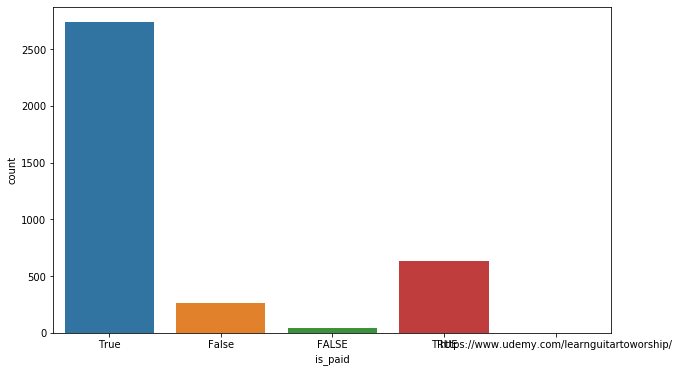

In [39]:
unique = udemy_course.is_paid.unique()

ax, fig = plt.subplots(figsize=(10,6))
ax = sns.countplot(data=udemy_course, x='is_paid')

# CONFIDENCE INTERVAL

<P> LETS MAKE A STATISTICAL INFERENCE BY COMPUTING CONFIDENCE INTERVAL OF THE NUMBER OF SUBSCRIBERS.
LET US ASSUME WE ARE GETTING 25% OF SAMPLE FROM THE POPULATION OF THE LENTH OF SUBSCRIBERS TO GET THE AN ESTIMATE OF
THE TOTAL MEAN NUMBER OF SUBSCRIBERS 
</p>

In [5]:
#getting all the total number of subscribers
subscribers = udemy_course['num_subscribers']

#lets convert to array so we can use the numpy functions 
subscribers_array = np.array(subscribers)
total_population = np.sum(subscribers_array)
#lets get random sample data from the subscribers array n number of times
n_trials = 100
#lets specify the number of sample size we want to calculate the mean. 
sample_size = int(.25 * len(subscribers_array))

In [6]:
# draw 100 number of samples from the subscribers_array with no replacement, each of size sample_size
samples = np.array([np.random.choice(subscribers_array, sample_size, replace=False) 
                    for i in range(n_trials)])

[3311.98804348 3315.60543478 3179.1173913  3216.90326087 3161.56086957
 3073.53043478 3022.14782609 3433.36304348 3146.41521739 3073.36956522
 3436.70652174 3199.74347826 3147.65869565 3569.55652174 3454.90652174
 2670.77173913 3085.14347826 3052.6423913  3045.825      3412.69673913
 2654.23586957 3754.55217391 2989.30217391 3017.24347826 3055.31521739
 3359.09565217 3250.1826087  3139.07391304 3197.85978261 3842.22173913
 3242.48152174 3015.82391304 3072.00217391 3277.75978261 3440.79021739
 2963.6173913  3610.42717391 2775.58369565 3354.1826087  3469.03152174
 2906.3076087  3093.77065217 3220.51304348 3097.14347826 3263.63913043
 3387.71956522 2966.42282609 3885.55434783 2765.09130435 2920.43152174
 3020.9673913  3675.50869565 3466.12391304 2921.64456522 3127.42717391
 3143.29891304 3032.80434783 3116.06304348 2922.07934783 2999.67826087
 2973.31630435 3210.10217391 3061.99673913 3509.49673913 3464.61304348
 3627.91521739 3307.83369565 2883.66521739 3227.60108696 3835.9826087
 3201.0

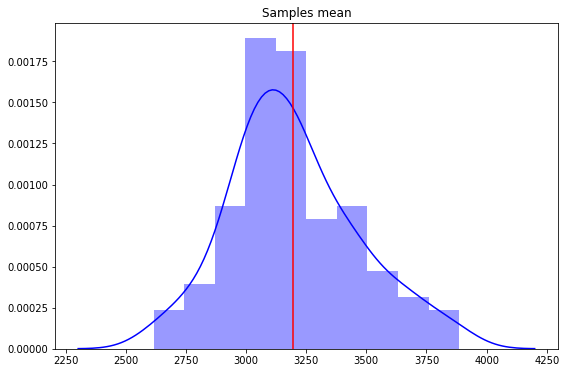

In [8]:
#let us get the means of all the rows of the samples
np.random.seed(sample_size)
population_mean = np.mean(subscribers_array)
population_std = np.std(subscribers_array)
samples_mean = np.mean(samples, axis=1)
samples_std = np.std(samples, axis=1)
#we will construct a graph to show the normal curve displaying the loaction of the means
ax,fig=plt.subplots(figsize=(9,6))
ax = sns.distplot(samples_mean, kde=True, bins=10, color='blue')
plt.axvline(population_mean, linestyle='solid', color='r')
plt.title('Samples mean')
#sigma error
std_error = population_std / math.sqrt(sample_size)
print('standard deviation error {}'.format(round(std_error), 2))


<p>
    Let's create several confidence intervals from the samples and plot them to get a better sense of what it means to "capture" the true mean. We will be finding 95% confidence interval
</p>

In [13]:
#lets assume we know the sigma for the population 
population_sigma = np.std(subscribers_array)
confidence_interval = 0.95
#let us sum the total population mean to get an over all mean to get an estimation of the pop mean
over_all_estimate_mean = np.mean(samples_mean)
#lets get the inversere
z= stat.norm.ppf(confidence_interval)
#using the formula of interval estimate xmean + or - (z∗σn‾√)margin of error. We will assume the x_mean of the samples
print('z-critical value')
print(z)
#calculate for margin of error
margin_of_error = z * (population_sigma / math.sqrt(sample_size))
#confidence interval of the lower and upper section of the sample means
confidence_interval = [over_all_estimate_mean-margin_of_error,over_all_estimate_mean+margin_of_error] 
print('The overall sample mean {} '.format(over_all_estimate_mean))
print('\n')
print('The estimated margin of error is estimated as {}'.format(margin_of_error))
print('\n')
print('The confidence of interval of the estimated population mean ')
print(confidence_interval)

z-critical value
1.6448536269514722
The overall sample mean 3196.765565217391 


The estimated margin of error is estimated as 515.011731406572


The confidence of interval of the estimated population mean 
[2681.7538338108193, 3711.777296623963]


If you don't know the standard deviation of the population, you have to use the standard deviation of your sample as a stand in when creating confidence intervals. Since the sample standard deviation may not match the population parameter the interval will have more error when you don't know the population standard deviation. To account for this error, we use what's known as a t-critical value instead of the z-critical value. The t-critical value is drawn from what's known as a t-distribution--a distribution that closely resembles the normal distribution but that gets wider and wider as the sample size falls. The t-distribution is available in scipy.stats with the nickname "t" so we can get t-critical values with stats.t.ppf().

Let's take a new, smaller sample and then create a confidence interval without the population standard deviation, using the t-distribution:

In [10]:
#t-critical is gotten from looking at the sample size -1
# d_of_freedom = sample_size - 1
# t_critical = stat.t.ppf(0.95, d_of_freedom)
# print('T-critical value:')
# print(t_critical)
# t_m_of_error = t_critical * (samples_std / math.sqrt(sample_size))
# t_confidence_interval = [population_mean - t_m_of_error, population_mean+t_m_of_error]
# t_confidence_interval
#just assumption

# PROPORTION OF PAID USERS

In [16]:
paid_subscribers = udemy_course.loc[udemy_course['is_paid'] == 'True']['num_subscribers']
paid_subscribers_array = np.array(paid_subscribers)
proportion_of_paid = np.sum(paid_subscribers_array) / total_population
print('the proportion of paid users is:')
print(proportion_of_paid)

the proportion of paid users is:
0.6499069906725393


# CONFIDENCE INTERVAL OF PROPORTION
<p>
    LET US IMAGINE, WE ARE SAMPLING FROM A LARGE POPUPLATION AND WE WANT TO GET AN APPROXIMATE
    MEAN ESTIMATE OF THE PAID USERS.
</p>

In [17]:
np.random.seed(sample_size)
# get the percentage proportion size from each sample from all the trials
proportion_samples = np.array([np.random.choice((paid_subscribers_array/np.sum(paid_subscribers_array)), sample_size, 
                                                replace=False) 
                               for i in range(n_trials)])
#get the mean values of all the sample arrays
proportion_samples_mean = np.mean(proportion_samples, axis=1)
proportion_samples_mean

array([0.00039905, 0.00036659, 0.00036453, 0.00039907, 0.00033562,
       0.00035879, 0.00039033, 0.00035047, 0.00033587, 0.00038103,
       0.00036136, 0.00032504, 0.0003647 , 0.00036779, 0.00041078,
       0.00040061, 0.00039495, 0.00035973, 0.00039388, 0.0004055 ,
       0.00037126, 0.00032507, 0.00037011, 0.00034707, 0.00038768,
       0.00042209, 0.00034716, 0.00034388, 0.00035472, 0.00040918,
       0.00036944, 0.00038487, 0.00037114, 0.00035147, 0.00035252,
       0.00039054, 0.00037407, 0.00034344, 0.00035299, 0.0003454 ,
       0.0003627 , 0.00033552, 0.00036058, 0.00036344, 0.0003618 ,
       0.00039489, 0.00035648, 0.00039478, 0.00037631, 0.00041547,
       0.00034242, 0.00037621, 0.00035497, 0.00034149, 0.00033062,
       0.00039019, 0.00037705, 0.0003665 , 0.00041142, 0.00034959,
       0.00037824, 0.00036336, 0.00034281, 0.00036301, 0.00037744,
       0.00038978, 0.00036595, 0.00039572, 0.00036777, 0.00037598,
       0.00040107, 0.00041734, 0.00036801, 0.00037344, 0.00034

Text(0.5, 1.0, 'proportion of paid users')

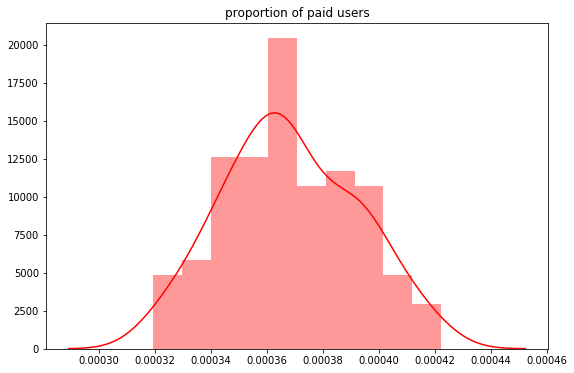

In [19]:
# lets construct mean proport graph to get a better visual representation
ax2, fig = plt.subplots(figsize=(9,6))
ax2 = sns.distplot(proportion_samples_mean, kde=True, bins=10, color='red')
plt.title('proportion of paid users')

In [20]:
over_all_sample_proportion = np.mean(proportion_samples_mean)

In [38]:
#lets get the 95% confidence interval
proportion_sub = over_all_sample_proportion*(1-over_all_sample_proportion)
prop_divide = proportion_sub / sample_size
proportion_me = z * math.sqrt(prop_divide)


m_e_proportion = [over_all_sample_proportion-proportion_me, over_all_sample_proportion+proportion_me]


print('==============================')
print('proportion mean estimate ' + '\n')
print(m_e_proportion)

proportion mean estimate 

[-0.0006722238226472593, 0.0014087984194477033]
